## HW 3 Assignment 1
Nurvirta Monarizqa (nm2773)

In [1]:
from __future__ import print_function
__author__= 'nm'

import pylab as pl
import seaborn
import numpy as np
import matplotlib.mlab as mlab

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Create functions to make the plotting easier:

In [25]:
md = {}
np.random.seed(185)

mysize = (linspace(5,2000,100)).astype(int)

def getsd(std):
    std_ = []
    for i in range(len(mysize)):
        std_.append(std/sqrt(mysize[i]))
    return std_

def getmean(distribution):
    md[distribution]['means'] = {}
    
    for nn in md[distribution]:
        if not type(nn) == str:
            md[distribution]['means'][nn] = md[distribution][nn].mean()
    return md[distribution]['means']

def plot_scatter(distribution,mean_dist):
    axchisq_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
    allmeans = list(md[distribution]['means'].values())
    for nn in md[distribution]:
        if not type(nn) == str:
            axchisq_mu_n.plot(nn, md[distribution]['means'][nn], 'o')
            axchisq_mu_n.set_xlabel('sample size', fontsize=18)
            axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
            axchisq_mu_n.set_title(distribution + ": mean", fontsize=24)
            axchisq_mu_n.plot([min(mysize), max(mysize)], [mean_dist, mean_dist], 'k')
            
def plot_hist(distribution,mean_dist):
    allmeans = list(md[distribution]['means'].values())
    pl.figure(figsize=(10, 5))
    result = pl.hist(allmeans,bins=50)
    pl.xlabel('sample mean', fontsize = 18)
    pl.ylabel('N', fontsize = 18)

    gau_mean = mean_dist
    gau_variance = np.var(allmeans)
    sigma = np.sqrt(gau_variance)
    x = np.linspace(min(allmeans),max(allmeans), 100)
    dx = result[1][1] - result[1][0]
    scale = len(allmeans)*dx
    plt.plot(x, mlab.normpdf(x,gau_mean,sigma)*scale)
    plt.show()

def plot_sd(std_parent,std_dist):
    pl.figure(figsize=(10, 5))
    parent, = pl.plot(mysize,std_parent, label = 'std/sqrt(n)')
    dist, = pl.plot(mysize,std_dist, label = 'std from simulation per sample')
    pl.title('Standard Deviation per Sample Size: ' + distribution, fontsize=20)
    pl.ylabel('standard deviation', fontsize = 18)
    pl.xlabel('sample mean', fontsize = 18)
    pl.legend(handles = [parent,dist])

## 1. Chi Square Distribution

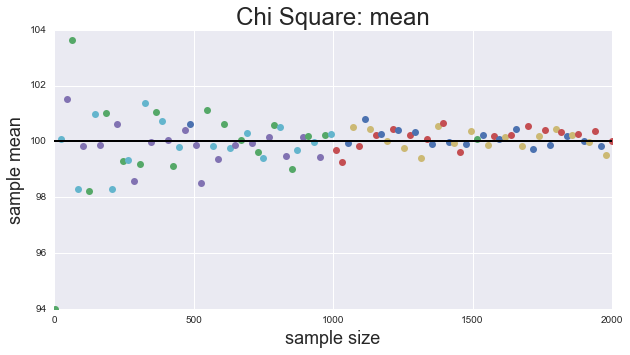

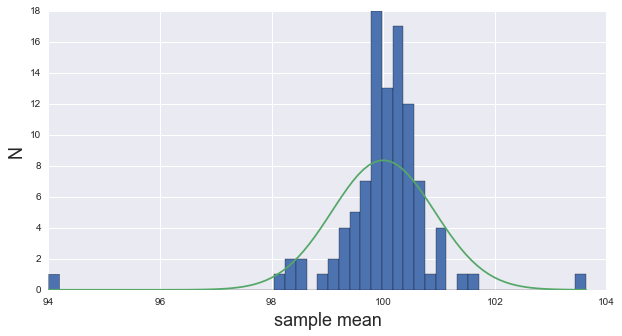

In [26]:
distribution = 'Chi Square'
md[distribution]= {}
df = 100
std = np.sqrt(2*df)

for n in mysize:
    md[distribution][n] = np.random.chisquare(df, size = n)

allmeans = getmean(distribution)
plot_scatter(distribution,df)
plot_hist(distribution,df)

#### Picture 1.1: Chi square sample size vs sample mean
In the Picture 1.1, we set parent distribution mean to 100. We can see that the larger the sample, the closer the sample mean to parent mean in the scatter plot. The histogram shows that the distribution is normally distributed and more concentrated around the mean.

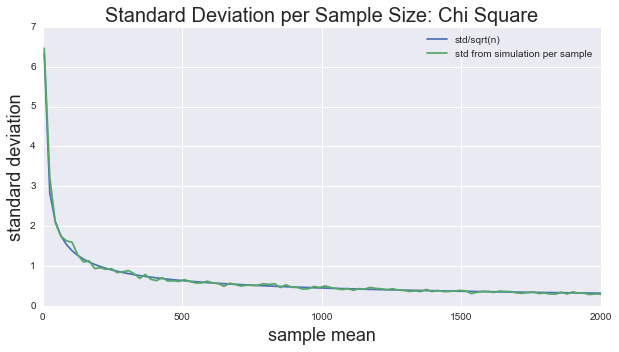

In [27]:
# central limit theorem's standard deviation for every sample N
std_parent = getsd(std)
std_dist = []
for i in range(len(mysize)):
    mn = []
    for j in range(100):
        mn.append(np.random.chisquare(df,size = mysize[i]).mean())
    std_dist.append(np.array(mn).std())
    
plot_sd(std_parent,std_dist)

#### Picture 1.2: Standard deviation of every sample - Chi Square
According to CLT, the standard deviation of sample distribution equals to standard deviation of its parents distribution divided by the square root of the sample size. We simulate 100 distribution of each sample size and calculate the mean, then calculate the standard deviation of the means. Turns out, the pattern (blue line) fits the CLT's standard deviation formula for every sample size (green line).

## 2. Normal Distribution

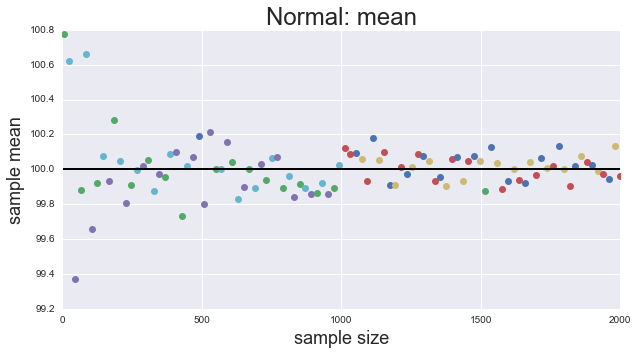

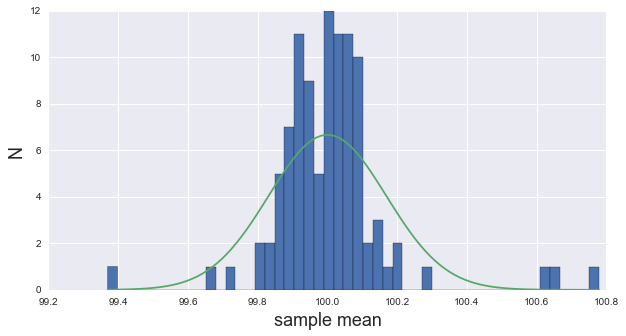

In [28]:
distribution = 'Normal'
md[distribution]= {}
mean = 100
std = 3

for n in mysize:
    md[distribution][n] = np.random.normal(mean,3, size = n)

allmeans = getmean(distribution)
plot_scatter(distribution,mean)
plot_hist(distribution,mean)

#### Picture 2.1: Normal distribution sample size vs sample mean
For the normal distribution in picture 2.1, we set the mean to 100 as well. In the scatter plot, we can see that the mean becomes near to 100 as the sample size increases. It is also reflected in the histogram where the means are more centered towards 100.

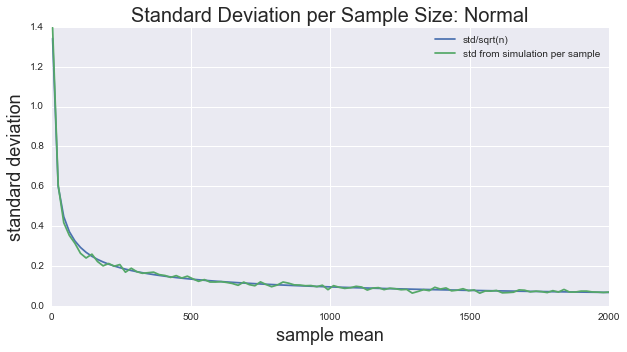

In [29]:
# central limit theorem's standard deviation for every sample N
std_parent = getsd(std)
std_dist = []
for i in range(len(mysize)):
    mn = []
    for j in range(100):
        mn.append(np.random.normal(mean,std,size = mysize[i]).mean())
    std_dist.append(np.array(mn).std())
    
plot_sd(std_parent,std_dist)

#### Picture 2.2: Standard deviation of every sample - Normal distribution
We set the standard deviation into 3 and simulate 100 normal distribution of each sample size. We calculate the mean, then calculate the standard deviation of the means. Turns out, the pattern (blue line) fits the CLT's standard deviation formula for every sample size (green line). 

## 3. Binomial Distribution

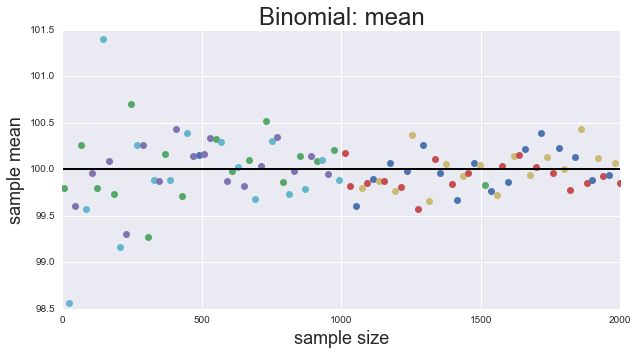

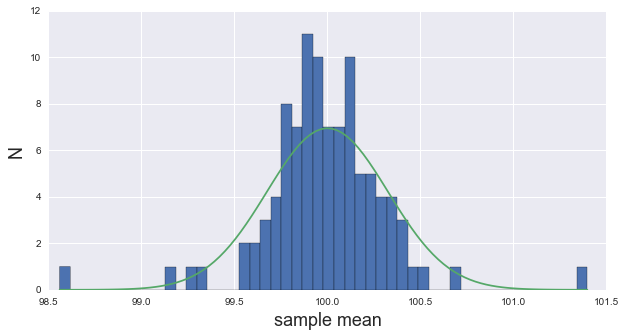

In [30]:
distribution = 'Binomial'
md[distribution]= {}
n_ = 200
p = 0.5
mean = p * n_
std = np.sqrt(n_*p*(1-p))

for n in mysize:
    md[distribution][n] = np.random.binomial(n_,p, size = n)

allmeans = getmean(distribution)
plot_scatter(distribution,mean)
plot_hist(distribution,mean)

#### Picture 3.1: Binomial distribution sample size vs sample mean
As for binomial distribution, we set the mean to 100. Same as the previous type of distribution, this distribution also satisfies center limit theorem where the sample mean are centered toward parent mean. 

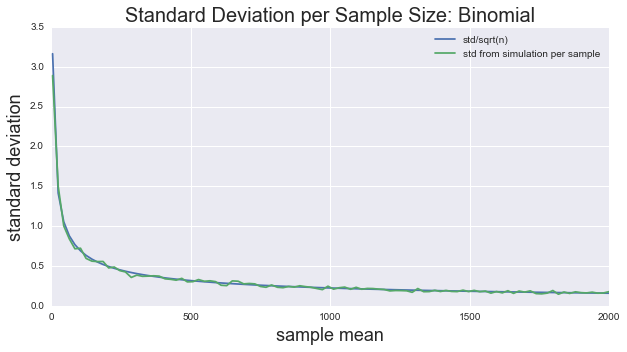

In [31]:
# central limit theorem's standard deviation for every sample N
std_parent = getsd(std)
std_dist = []
for i in range(len(mysize)):
    mn = []
    for j in range(100):
        mn.append(np.random.binomial(n_,p, size = mysize[i]).mean())
    std_dist.append(np.array(mn).std())
    
plot_sd(std_parent,std_dist)

#### Picture 3.2: Standard deviation of every sample - Binomial distribution
We set the standard deviation into sqrt(50) and simulate 100 normal distribution of each sample size. We calculate the mean, then calculate the standard deviation of the means. Turns out, the pattern (blue line) fits the CLT's standard deviation formula for every sample size (green line). Thus, this distribution satisfies central limit theorem.

## 4. Poisson Distribution

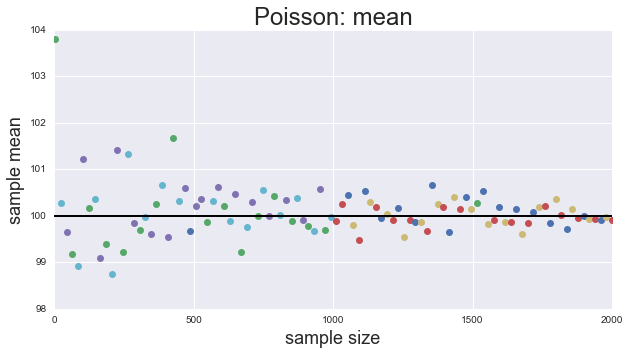

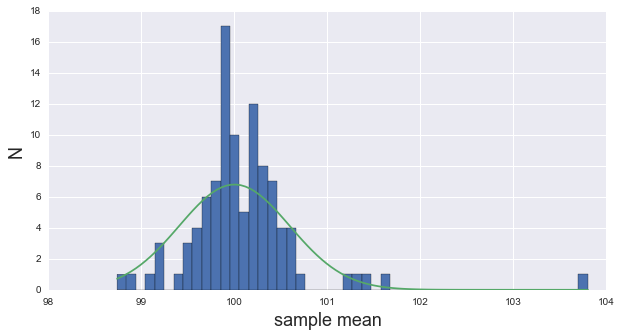

In [32]:
distribution = 'Poisson'
md[distribution]= {}
mean = 100
std = np.sqrt(mean)

for n in mysize:
    md[distribution][n] = np.random.poisson(mean, size = n)

allmeans = getmean(distribution)
plot_scatter(distribution,mean)
plot_hist(distribution,mean)

#### Picture 4.1: Poisson distribution sample size vs sample mean
For Poisson distribution, we set the mean to 100. As the sample size increases in the poisson distribution, the means are leaning toward the straight line y = 100 in the scatter plot. The histogram also proves that it is true that the means are centered to 100.

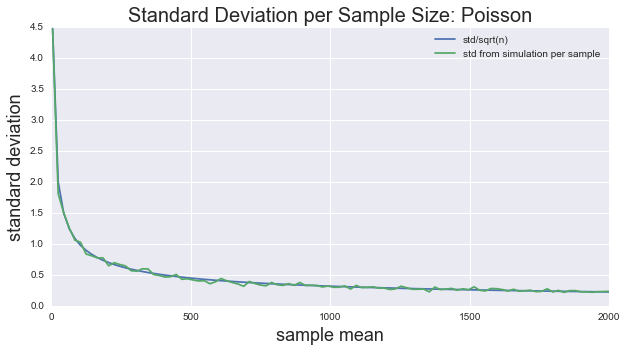

In [33]:
# central limit theorem's standard deviation for every sample N
std_parent = getsd(std)
std_dist = []
for i in range(len(mysize)):
    mn = []
    for j in range(100):
        mn.append(np.random.poisson(mean, size = mysize[i]).mean())
    std_dist.append(np.array(mn).std())
    
plot_sd(std_parent,std_dist)

#### Picture 4.2: Standard deviation of every sample - Poisson distribution
We set the standard deviation into sqrt(100) and simulate 100 normal distribution of each sample size. We calculate the mean, then calculate the standard deviation of the means. Turns out, the pattern (blue line) fits the CLT's standard deviation formula for every sample size (green line). Thus, this distribution satisfies central limit theorem.

## 5. Geometric Distribution

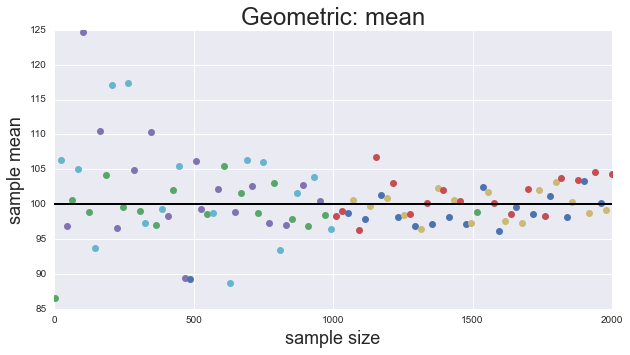

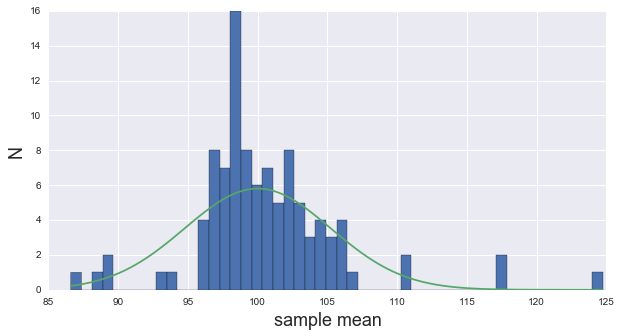

In [34]:
distribution = 'Geometric'
md[distribution]= {}
p = 0.01
std = np.sqrt((1-p)/(p**2))
mean = 1/p

for n in mysize:
    md[distribution][n] = np.random.geometric(p,size = n)

allmeans = getmean(distribution)
plot_scatter(distribution,mean)
plot_hist(distribution,mean)

#### Picture 5.1: Geometric distribution sample size vs sample mean
Our Geometric distribution mean equals to 100 because we set the p to 0.01. As the sample size increases in the poisson distribution, the means are leaning toward the straight line y = 100 in the scatter plot. The histogram also proves that it is true that the means are centered around 100.

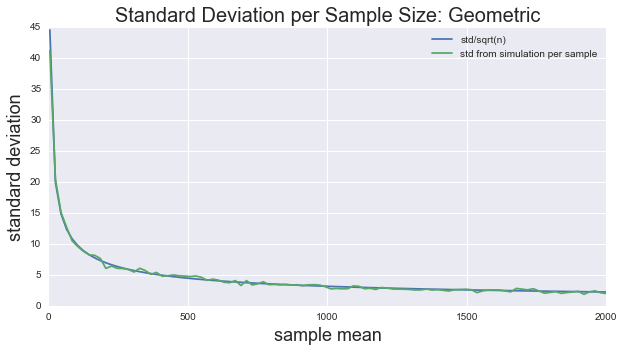

In [35]:
# central limit theorem's standard deviation for every sample N
std_parent = getsd(std)
std_dist = []
for i in range(len(mysize)):
    mn = []
    for j in range(100):
        mn.append(np.random.geometric(p, size = mysize[i]).mean())
    std_dist.append(np.array(mn).std())
    
plot_sd(std_parent,std_dist)

#### Picture 5.2: Standard deviation of every sample - Geometric distribution
Similar with previous distribution, the plot above shows how the standard deviation of each sample size matches with CLT formula for standard deviation :parent_std/sqrt(sample_size). Thus we can confirm that this distribution satisfies central limit theorem.

## Histogram of all distribution

In [94]:
allvalues = []
for dist in md.keys():
    allvalues = allvalues + list(md[md.keys()[0]]["means"].values())
len(allvalues)

500

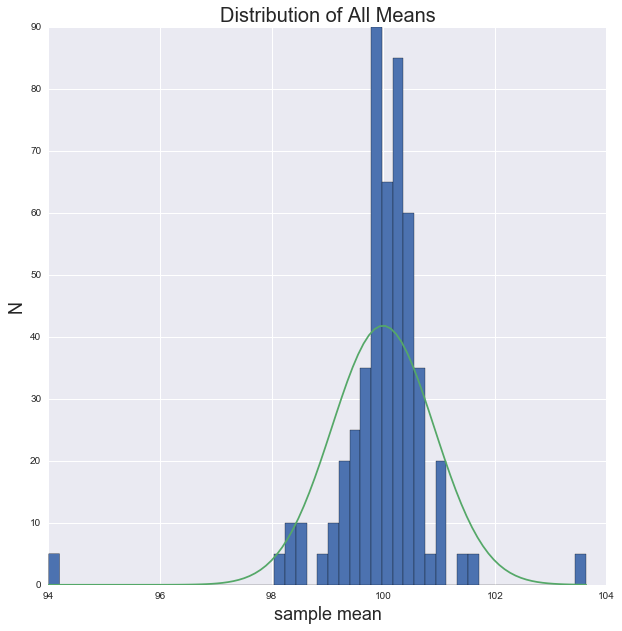

In [109]:
pl.figure(figsize=(10,10))
result = pl.hist(allvalues,bins=50)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distribution of All Means', fontsize = 20)

gau_mean = np.mean(allvalues)
gau_variance = np.var(allvalues)
sigma = np.sqrt(gau_variance)
x = np.linspace(min(allvalues),max(allvalues), 100)
dx = result[1][1] - result[1][0]
scale = len(allvalues)*dx
plt.plot(x, mlab.normpdf(x,gau_mean,sigma)*scale)
plt.show()

#### Picture 6
Here we plot all 500 samples. It fits gaussian distribution and it is centered around 100, our assigned mean.